# Exploratory Data Analysis (EDA)
<center>
<img src="https://cdn1.iconfinder.com/data/icons/big-data-orchid-vol-1/256/Exploratory_Analysis-512.png" alt="drawing" width="260"/>
</center>

This notebook focuses on performing exploratory data analysis *(EDA)* on the dataset. EDA helps in understanding the structure, patterns, and relationships in the data, which is crucial for making decisions before feeding it to a ML Algorithm.

## Table of Contents
1. [Introduction](#introduction)
2. [Importing Libraries](#importing-libraries)
3. [Loading the Data](#loading-the-data)
4. [Data Overview](#data-overview)
   - 4.1 [General Information](#general-information)
   - 4.2 [Descriptive Statistics](#descriptive-statistics)
   - 4.3 [Visual Statistics](#visual-statistics)
5. [Conclusion](#conclusion)
---

## Introduction

- This notebook focuses on cleaning and preparing the raw data for analysis. The dataset used is defined as below:
  
  - **<font color='red'>Dataset description: </font>**
  The Titanic dataset contains information about the passengers of the RMS Titanic, 
  - **<font color='red'>Dataset source</font>:** https://www.kaggle.com/c/titanic/data
  - **<font color='red'>Dataset contents</font>:** This Dataset includes various details about each passenger, such Passenger Class, Sex, Age and survival status, etc.
  - **<font color='red'>Dataset purpose</font>:**  This dataset is commonly used for binary classification tasks to predict whether a passenger survived or not.
---

## Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import __________

## Loading the Data

In [2]:
# Loading the raw 'titanic.csv' data into a DataFrame for exploration.
titanic_data = pd.read_csv("../data/titanic.csv")
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Overview


### General Information


In [3]:
# getting general information about the 'titanic_data' dataset.
print(titanic_data.info())
print('\nColumns= {}'.format(list(titanic_data.columns)))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Columns= ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


### Descriptive Statistics


In [4]:
# statistical Description of the DataFrame .
titanic_data.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Visual Statistics

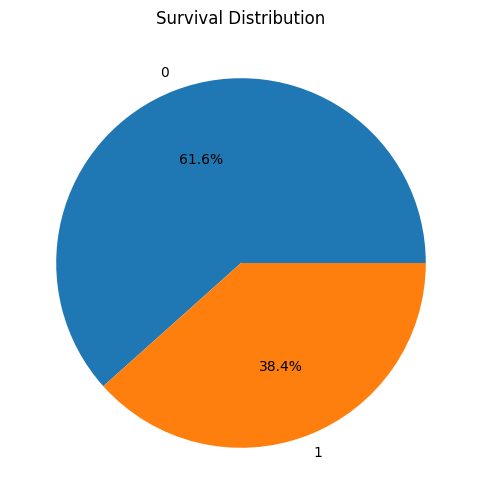

In [5]:
# survivors vs non survivors distribution
survived_counts = titanic_data["Survived"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(survived_counts, labels=survived_counts.index, autopct='%1.1f%%')
plt.title('Survival Distribution')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

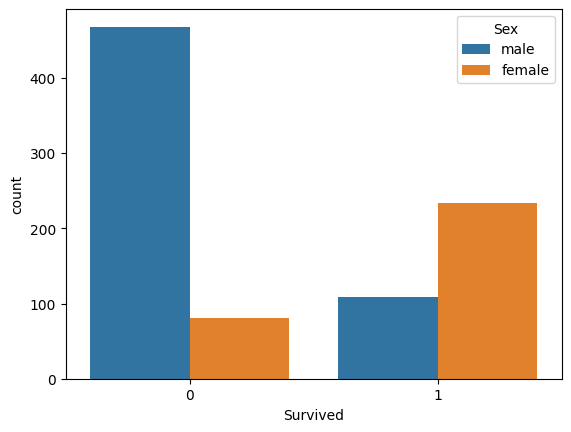

In [6]:
# survival rates between genders
sns.countplot(x='Survived', hue='Sex', data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

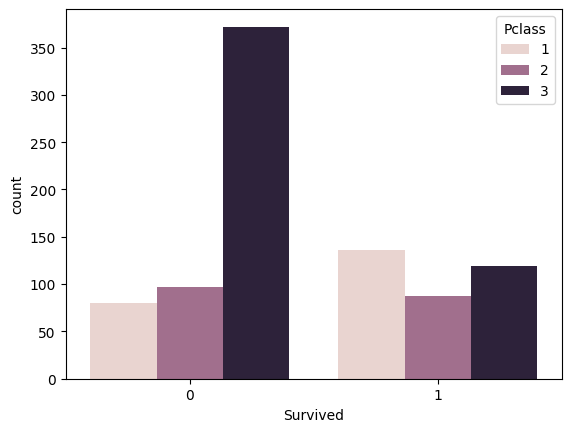

In [7]:
# survival rates between passenger classes
sns.countplot(x="Survived", hue='Pclass', data=titanic_data)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

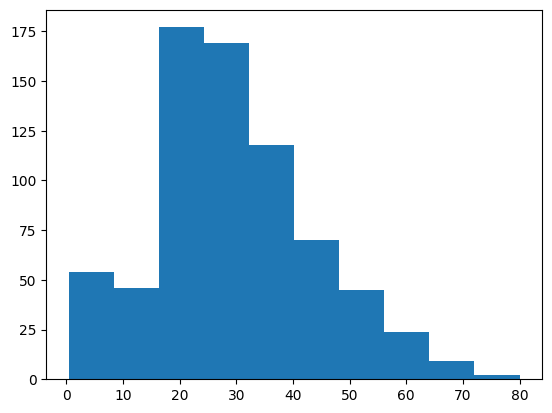

In [8]:
# sge distribution of Titanic passengers(excluding 'null' values for 'Age')
plt.hist(titanic_data['Age'].dropna())

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

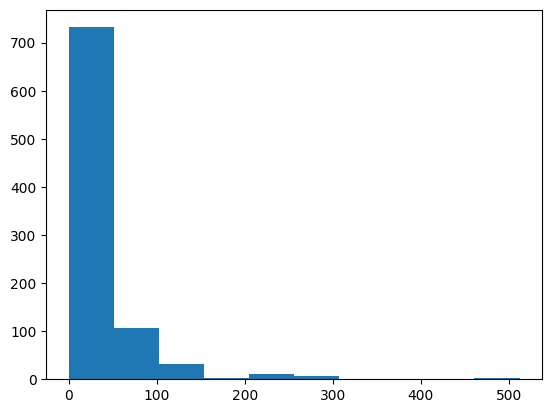

In [9]:
# ticket price distribution
plt.hist(titanic_data['Fare'])

## Conclusion
EDA is a crucial step in data analysis that helps in understanding the data better and making informed decisions for further processing and model building.